# **Challenge: A food delivery service is facing challenges in achieving profitability across its operations.**

With a dataset of 1,000 food orders, the service seeks to understand the dynamics of its cost structure and profitability to identify strategic opportunities for improvement.


**Tasks:**

Detailed Cost Analysis: Identifying the major cost components associated with
delivering food orders, including direct costs like delivery fees and indirect costs like discounts and payment processing fees.


1.   Detailed Cost Analysis: Identifying the major cost components associated with
delivering food orders, including direct costs like delivery fees and indirect costs like discounts and payment processing fees.

2.   Profitability Evaluation: Calculating the profitability of individual orders and aggregating this data to assess overall profitability. This involves examining how revenue generated from commission fees measures against the total costs.

3. Strategic Recommendations for Improvement: Based on the cost and profitability analysis, identifying actionable strategies to reduce costs, adjust pricing, commission fees, and discount strategies to improve profitability. This includes finding a “sweet spot” for commission and discount percentages that ensures profitability across orders.

4. Impact Simulation of Proposed Strategies: Simulating the financial impact of the recommended strategies on profitability, using the dataset to forecast how adjustments in commission rates and discount strategies could potentially transform current losses into profits.






**Importing required Dataset for analysis**

In [1]:
# Importing required dataset

from google.colab import files


uploaded = files.upload()

Saving food_orders_new_delhi.csv to food_orders_new_delhi.csv


In [2]:
import pandas as pd

food_orders=pd.read_csv("food_orders_new_delhi.csv")

In [3]:
#Checking first 5 rows of data

food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,01-02-2024 01:11,01-02-2024 02:39,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,02-02-2024 22:11,02-02-2024 22:46,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,31-01-2024 05:54,31-01-2024 06:52,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,16-01-2024 22:52,16-01-2024 23:38,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,29-01-2024 01:19,29-01-2024 02:48,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
# Checking null contents & datatypes of each column

food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    1000 non-null   object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


The dataset contains 1,000 entries and 12 columns, with no missing values in any of the columns.

**Data Cleaning**

In [5]:
# Converting “Order Date and Time” and “Delivery Date and Time” to a datetime format since it is not in a required format.

from datetime import datetime

# convert date and time columns to datetime
food_orders['Order Date and Time'] = pd.to_datetime(food_orders['Order Date and Time'])
food_orders['Delivery Date and Time'] = pd.to_datetime(food_orders['Delivery Date and Time'])

In [6]:
# Confirming datatypes again

food_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Order ID                1000 non-null   int64         
 1   Customer ID             1000 non-null   object        
 2   Restaurant ID           1000 non-null   object        
 3   Order Date and Time     1000 non-null   datetime64[ns]
 4   Delivery Date and Time  1000 non-null   datetime64[ns]
 5   Order Value             1000 non-null   int64         
 6   Delivery Fee            1000 non-null   int64         
 7   Payment Method          1000 non-null   object        
 8   Discounts and Offers    1000 non-null   object        
 9   Commission Fee          1000 non-null   int64         
 10  Payment Processing Fee  1000 non-null   int64         
 11  Refunds/Chargebacks     1000 non-null   int64         
dtypes: datetime64[ns](2), int64(6), object(4)
memory 

In [7]:
# As observed, discounts & offers recorded are not in numeric format as required for analysis
# first, let's create a function to extract numeric values from the 'Discounts and Offers' string

def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

In [8]:
# applying the function to create a new 'Discount Percentage' column
food_orders['Discount Percentage'] = food_orders['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [9]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,15.0
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0.0
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0


In [10]:
#applying function to create new column "Discount Amount" to get actual discounted amount
food_orders['Discount Amount']= food_orders.apply(lambda x:(x["Order Value"]*x["Discount Percentage"]/100)
                                                  if x["Discount Percentage"]>0 else x["Discount Percentage"],axis=1)

In [11]:
print(food_orders[["Order ID","Order Value", "Discounts and Offers","Discount Percentage","Discount Amount"]])

     Order ID  Order Value Discounts and Offers  Discount Percentage  \
0           1         1914            5% on App                  5.0   
1           2          986                  10%                 10.0   
2           3          937         15% New User                 15.0   
3           4         1463                 None                  0.0   
4           5         1992         50 off Promo                 50.0   
..        ...          ...                  ...                  ...   
995       996          825            5% on App                  5.0   
996       997         1627                 None                  0.0   
997       998          553                 None                  0.0   
998       999         1414         15% New User                 15.0   
999      1000         1657         15% New User                 15.0   

     Discount Amount  
0              95.70  
1              98.60  
2             140.55  
3               0.00  
4             996.00

In [12]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


**Cost and Profitability Analysis**

In [13]:
# Calculating Total Cost, Revenue & Profit generated from each order
food_orders["Total Costs"]=food_orders["Delivery Fee"]+ food_orders["Payment Processing Fee"]+food_orders["Discount Amount"]
food_orders["Revenue"]=food_orders["Commission Fee"]
food_orders["Profit"]=food_orders["Revenue"]-food_orders["Total Costs"]

In [14]:
food_orders.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,3,C6390,R2870,2024-01-31 05:54:00,2024-01-31 06:52:00,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00
4,5,C6734,R2799,2024-01-29 01:19:00,2024-01-29 02:48:00,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00


In [15]:
# Calculating total cost, total revenue & total profit from overall orders
total_orders=food_orders.shape[0]
total_revenue=food_orders["Revenue"].sum()
total_costs = food_orders['Total Costs'].sum()
total_profit = food_orders["Profit"].sum()


overall_metrics={"Total Orders": total_orders,
                 "Total Revenue":total_revenue,
                 "Total Costs": total_costs,
                 "Total Profit": total_profit}

print(overall_metrics)


{'Total Orders': 1000, 'Total Revenue': 126990, 'Total Costs': 232709.85, 'Total Profit': -105719.85}


Based on the analysis, here are the overall metrics for the food delivery operations:


*   **Total Orders: 1,000**
*   **Total Revenue (from Commission Fees): 126,990 INR**
*   **Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)**
*   **Total Profit: -105,719.85 INR**








The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

In [16]:
import matplotlib.pyplot as plt

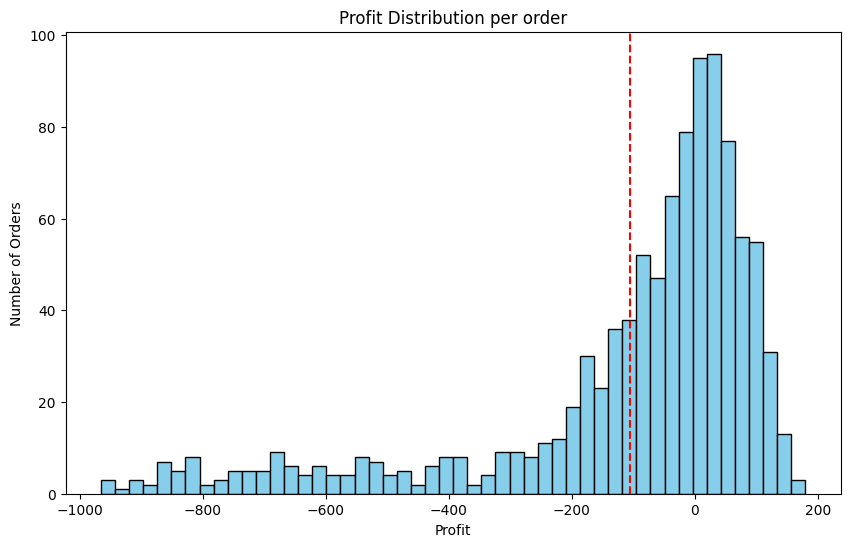

In [17]:
# Creating a histogram of profits per order to visualize the distribution of profitable and unprofitable orders.

plt.figure(figsize=(10,6))
plt.hist(food_orders["Profit"],bins=50,color="skyblue",edgecolor="black")
plt.title("Profit Distribution per order")
plt.xlabel("Profit")
plt.ylabel("Number of Orders")
plt.axvline(food_orders["Profit"].mean(),color="red",linestyle="dashed")
plt.show()

**Observation:** The histogram shows a wide distribution of profit per order, with a significant number of orders resulting in a loss (negative profits). The red dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

In [18]:
# Let's analyse the cost breakdown of total cost being incuured from service

costs_breakdown = food_orders[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
costs_breakdown

Delivery Fee               28620.00
Payment Processing Fee     29832.00
Discount Amount           174257.85
dtype: float64

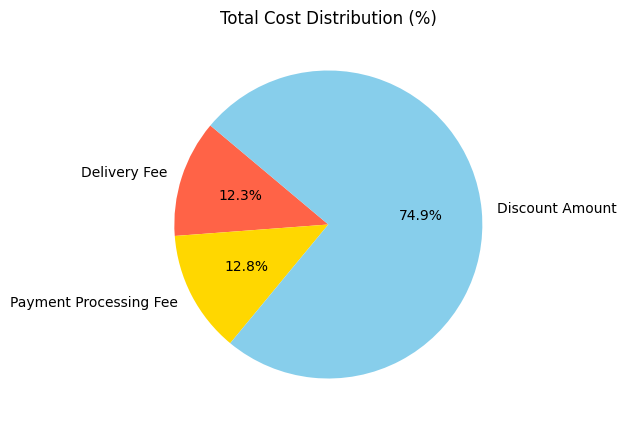

In [19]:
# Let's visualise the cost breakdown

plt.figure(figsize=(5,5))
plt.pie(costs_breakdown,labels=costs_breakdown.index,autopct='%1.1f%%', startangle=140,colors=["tomato","gold","skyblue"])
plt.title("Total Cost Distribution (%)")
plt.show()

**Observation:** Discounts constitute a significant portion of the costs, suggesting that discounting strategies might be heavily impacting overall profitability.

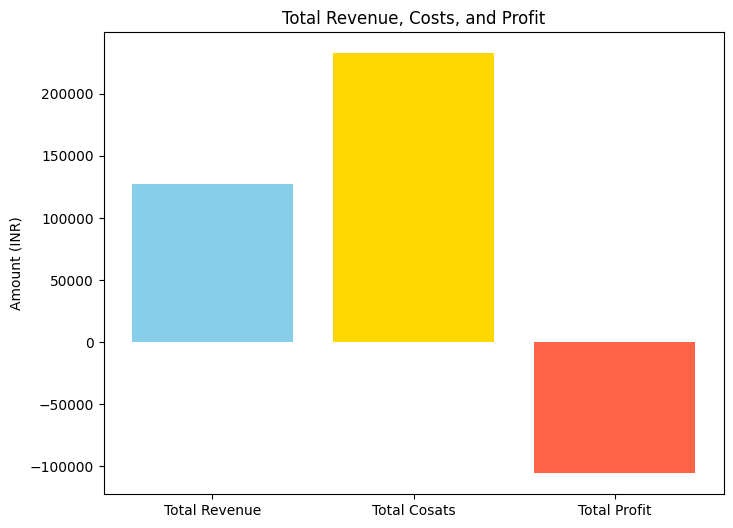

In [20]:
# Comapring overall Total cost, Revenue & Profit

totals = ['Total Revenue', 'Total Cosats', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(8, 6))
plt.bar(totals, values, color=['skyblue', 'gold', 'tomato'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount (INR)')
plt.show()

**Observation:** The above chart represents the gap between revenue and costs, clearly indicating that the total costs (expense) surpass the revenue, leading to a total loss.

**Strategy Check Analysis**

From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. Lets analyse the profits changing commission fees and discount percentages.

In [21]:
# Analysing the orders that resulted into profits

profitable_orders=food_orders[food_orders["Profit"]>0]
profitable_orders

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00
5,6,C7265,R2777,2024-01-25 04:36:00,2024-01-25 05:27:00,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10
6,7,C1466,R2457,2024-12-01 23:55:00,2024-01-13 00:48:00,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
988,989,C8311,R2380,2024-01-31 06:48:00,2024-01-31 08:43:00,1511,0,Credit Card,5% on App,136,10,0,5.0,75.55,85.55,136,50.45
989,990,C8186,R2622,2024-09-01 17:54:00,2024-09-01 18:42:00,1058,50,Credit Card,5% on App,182,45,0,5.0,52.90,147.90,182,34.10
995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,5.0,41.25,88.25,165,76.75
996,997,C6797,R2742,2024-01-28 08:50:00,2024-01-28 10:10:00,1627,50,Cash on Delivery,None,110,42,0,0.0,0.00,92.00,110,18.00


In [22]:
# Let's calculate average commission percentage and average discount percentage

profitable_orders["Commission Percentage"]=(profitable_orders["Commission Fee"]/profitable_orders["Order Value"])*100
profitable_orders.head()

<ipython-input-22-aec4245d27e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders["Commission Percentage"]=(profitable_orders["Commission Fee"]/profitable_orders["Order Value"])*100


,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage
0,1,C8270,R2924,2024-01-02 01:11:00,2024-01-02 02:39:00,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,7.836991
1,2,C1860,R2054,2024-02-02 22:11:00,2024-02-02 22:46:00,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,20.081136
3,4,C6191,R2642,2024-01-16 22:52:00,2024-01-16 23:38:00,1463,50,Cash on Delivery,None,146,27,0,0.0,0.00,77.00,146,69.00,9.979494
5,6,C7265,R2777,2024-01-25 04:36:00,2024-01-25 05:27:00,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,20.956720
6,7,C1466,R2457,2024-12-01 23:55:00,2024-01-13 00:48:00,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85,47.524752


In [27]:
avg_commission_percent= profitable_orders["Commission Percentage"].mean()
avg_discount_percent=profitable_orders["Discount Percentage"].mean()

print(avg_commission_percent,avg_discount_percent)

30.508436145149435 5.867469879518072


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

**New Average Commission Percentage: 30.51%**

**New Average Discount Percentage: 5.87%**

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly reducing order volume.

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 6% could potentially improve profitability across the board.

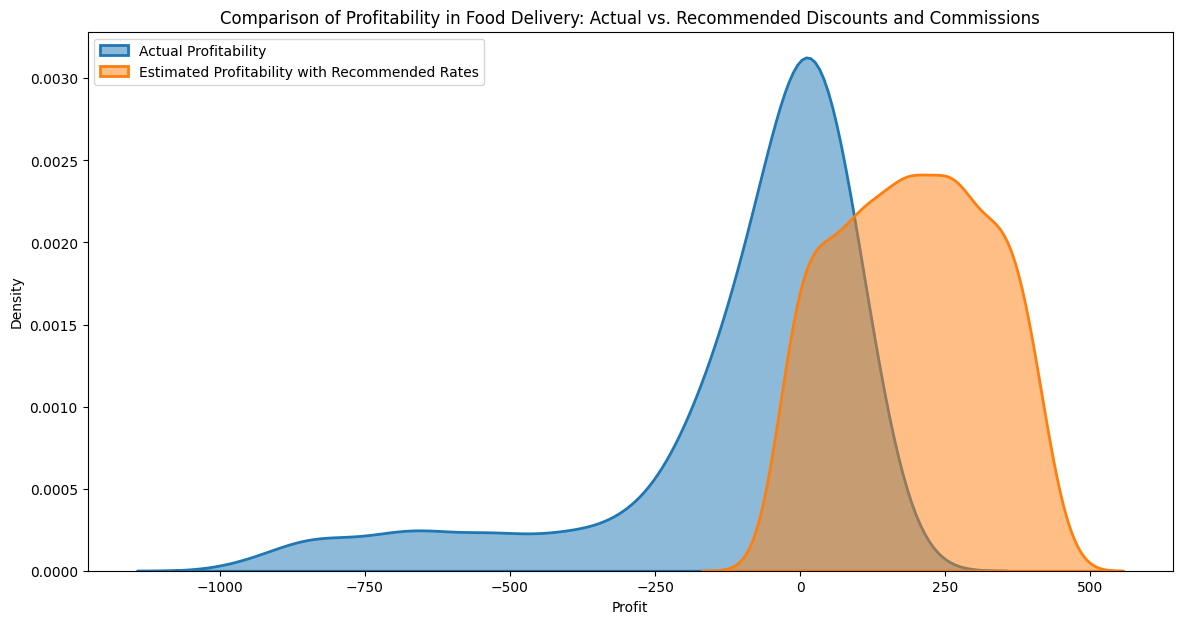

In [28]:
# Analysing the Cost and Profitability metrics by substituting new values for commisison fee and discounts

recommended_commission_percentage = 30.0  # 30%
recommended_discount_percentage = 6.0    # 6%

# calculate the simulated commission fee and discount amount using recommended percentages
food_orders['Simulated Commission Fee'] = food_orders['Order Value'] * (recommended_commission_percentage / 100)
food_orders['Simulated Discount Amount'] = food_orders['Order Value'] * (recommended_discount_percentage / 100)

# recalculate total costs and profit with simulated values
food_orders['Simulated Total Costs'] = (food_orders['Delivery Fee'] +
                                        food_orders['Payment Processing Fee'] +
                                        food_orders['Simulated Discount Amount'])

food_orders['Simulated Profit'] = (food_orders['Simulated Commission Fee'] -
                                   food_orders['Simulated Total Costs'])

# let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders

import seaborn as sns

plt.figure(figsize=(14, 7))

# actual profitability
sns.kdeplot(food_orders['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulated profitability
sns.kdeplot(food_orders['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')
plt.show()

**Observation:** The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.

**Conclusion:** In order to increase the profitablity from service without compromising the volume orders, there are two ways that can boost profit values, they are as 1. Increasing the commision percentage for every order, 2. Applying discout values upto average discount percentage to maintain the profits towards positive bar.